In [ ]:
# 애플의 시계열 주가 데이터를 학습하고 예측하는 문제입니다. 

# apple_stock.csv  파일에   종가(close) 를  5일단위로 학습하고  

# 4일치 애플 주식의 종가(close) 데이터가 입력되면 
# 그 다음날 애플 주식의 종가(close)를 예측하는 프로그램을 작성하세요.

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

def make_data() :
    """
    Keras 에서 RNN 을 사용하려면 입력 데이터는 
    (nb_samples, timesteps, input_dim) 크기를 가지는 
    ndim=3인 3차원 텐서(tensor) 형태이어야 한다.

    nb_samples: 자료의 수
    timesteps: 순서열의 길이
    input_dim: x 벡터의 크기
    여기에서는 단일 시계열이므로 input_dim = 1 이고 
    3 스텝 크기의 순서열을 사용하므로 timesteps = 4 이며 자료의 수는 2265 개이다.

    다음코드와 같이 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환하여 3차원 텐서를 만든다.
    """
    
    DataDf = pd.read_csv("apple_stock.csv") 
    Data = DataDf.to_numpy() 
    
     
    X_train = Data[:, 1:5][:, :, np.newaxis].astype(np.float32)
                # np.newaxis : numpy array의 차원을 늘려줌. 1D->2D,2D->3D,3D->4D 
    Y_train = Data[:, 4].astype(np.float32)
    
    
    print("X_train.shape, Y_train.shape  = ", X_train.shape, Y_train.shape  ) 
    #print(Data)
    return X_train, Y_train

In [170]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense 


def make_model() :
    model = Sequential() 
    # model.add(SimpleRNN(hidden_size, input_shape=(timesteps, input_dim)))
    model.add(SimpleRNN(12, input_shape=(4, 1))) ## 4 개의 시계열 데이터 입력
    model.add(Dense(1))  #, activation="linear"
    model.compile(loss='mse', optimizer='sgd')
    model.summary()
    return model

In [165]:
import numpy as np
import pandas as pd
df = pd.read_csv("apple_stock.csv")
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...,...
2260,2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2261,2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2262,2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2263,2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996


In [173]:
import numpy as np
import matplotlib.pyplot as plt

(X_train,Y_train) = make_data()
model= make_model() #RNN 모델 생성
print(X_train)

X_train.shape, Y_train.shape  =  (2265, 4, 1) (2265,)
Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_72 (SimpleRNN)   (None, 12)                168       
                                                                 
 dense_72 (Dense)            (None, 1)                 13        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
[[[ 30.47857 ]
  [ 30.08    ]
  [ 30.447144]
  [ 30.104286]]

 [[ 30.642857]
  [ 30.34    ]
  [ 30.49    ]
  [ 30.572857]]

 [[ 30.79857 ]
  [ 30.464285]
  [ 30.657143]
  [ 30.625713]]

 ...

 [[156.77    ]
  [150.07    ]
  [155.84    ]
  [156.15    ]]

 [[158.52    ]
  [154.55    ]
  [157.5     ]
  [156.23    ]]

 [[159.36    ]
  [156.48    ]
  [158.53  

71/71 [==============================] - 0s 1ms/step


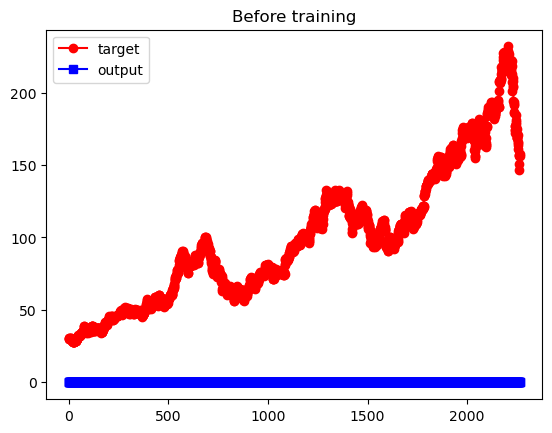

In [172]:
# # 학습 전 예측 결과

plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
# plt.xlim(20, 180)
# plt.ylim(20, 180)
plt.legend()
plt.title("Before training")
plt.show()

In [174]:
# 학습
history = model.fit(X_train, Y_train, epochs=100, verbose=0)

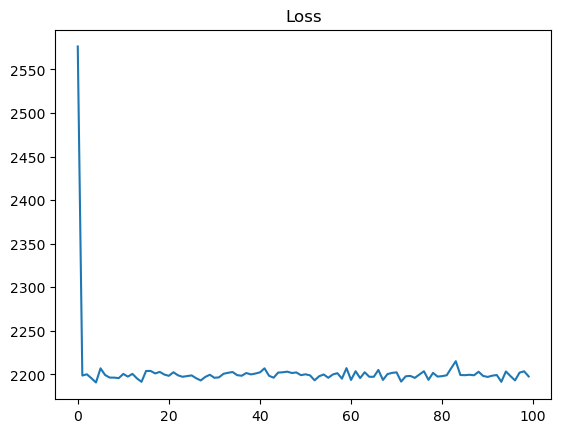

In [175]:
# 학습 후 loss
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

71/71 [==============================] - 0s 1ms/step


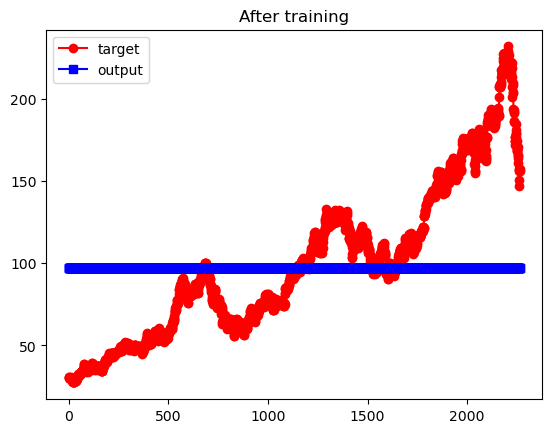

In [177]:
# 학습 후 예측 결과
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
# plt.xlim(20, 180)
# plt.ylim(20, 180)
plt.legend()
plt.title("After training")
plt.show()